<div class="alert alert-block alert-success">
    <h3>HSAF</h3></div>


<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
[Section 1](#section1) Product Download
<hr>
</div>

[Section 2](#section2) WGRIB2 tool Installation
<hr>
</div>

[Section 3](#section3) File conversion from GRIB2 format into NETCDF format 
<hr>
</div>

[Section 4](#section4) Read Input
<hr>
</div>

[Section 5](#section5) Select the Interested Area
<hr>
</div>

[Section 6](#section6) Plot
<hr>
</div>

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. PRODUCT DOWNLOAD

[Back to top](#TOC_TOP)

</div>

Once registered, it s possible to download HSAF products from the link https://hsaf.meteoam.it/User/UserSupport 

from /PRODUCTS buttom in the upper right hand corner.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. WGRIB2 tool Installation
[Back to top](#TOC_TOP)

</div>

The <font color='red'> **file format conversion** </font>  from GRIB2 to NETCDF can be realized by using <font color='red'> **"WGRIB2"** </font> tool.

The "WGRIB2" tool can be installed locally on your <font color='red'> **LINUX** </font> environment by following the steps below:

Initially the system needs to be updated:

    1) sudo apt-get update
    2) sudo apt-get upgrade

Then, install the necessary development <font color='red'> **"PACKAGES"** </font> for the compilation: <font color='red'> **GFORTRAN** </font> & <font color='red'> **GCC** </font>, therefore:

   3) sudo apt install -y build-essential libaec-dev zlib1g-dev libcurl4-openssl-dev libboost-dev curl wget zip unzip bzip2 gfortran gcc g++

Decide a <font color='red'> **"Path Name"** </font>to create a directory: e.g. grib2

    4) mkdir -p grib2
    5) cd grib2

Now, you can install the latest version (to be checked first!) of the source code from the link "https://www.ftp.cpc.ncep.noaa.gov/wd51we/wgrib2/ " .

In this case:

    6) wget -c ftp://ftp.cpc.ncep.noaa.gov/wd51we/wgrib2/wgrib2.tgz

Extract the source to the current directory:

    7) tar -xzvf wgrib2.tgz

Go to the path:

    8) cd grib2

<font color='red'> **Export** </font> the flags which are important for compilation. 

    9) export CC=gcc

    10) export FC=gfortran


Compile and make binary

    11) make

Check if the wgrib2 binary is made properly.

    12) wgrib2/wgrib2 -config

Copy the wgrib2 binary to <font color='red'> **bin** </font> directory, so that it can be executed directly from the terminal.

If your first time, you need to change the <font color='red'> **permissions** </font> by using the command below:

    13) (OPTIONAL) cd /usr/local

The permission:

    14) (OPTIONAL)sudo chmod 777 bin

Copy to "bin" directory

    15) cp -rfv wgrib2/wgrib2 /usr/local/bin/wgrib2

<div class="alert alert-info" role="alert">

## <a id='section2'></a>3. File conversion from GRIB2 format into NETCDF format
[Back to top](#TOC_TOP)

</div>



Now it is possible to convert the GRIB2 file format into NETCDF format by using the following command in the SHELL in LINUX:

**wgrib2 -netcdf FILE_NAME_AS_YOU_WANT.nc DOWNLODED_HSAF_PRODUCT_NAME.grb**

In our case:

wgrib2 -netcdf HSAF_EXAMPLE.nc h05B_20200101_0000_03_fdk.grb


<div class="alert alert-info" role="alert">

## <a id='section2'></a>4. Read Input
[Back to top](#TOC_TOP)

</div>

Once you have imported the necessary <font color='red'> **libraries** </font>, you can read the converted input file via <font color='red'> **xarray**</font> and explore the input data.

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
t=xr.open_dataset("HSAF_EXAMPLE.nc")

In [3]:
t

<xarray.Dataset>
Dimensions:        (y: 3712, x: 3712, time: 1)
Coordinates:
  * y              (y) float64 0.0 1.0 2.0 3.0 ... 3.709e+03 3.71e+03 3.711e+03
  * x              (x) float64 0.0 1.0 2.0 3.0 ... 3.709e+03 3.71e+03 3.711e+03
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
  * time           (time) datetime64[ns] 2020-01-01
Data variables:
    ESTP_no_level  (time, y, x) float32 ...
    ESTP_surface   (time, y, x) float32 ...
Attributes:
    Conventions:          CF-1.0
    History:              created by wgrib2
    GRIB2_grid_template:  90

For example, it is possible to display the "Estimated Precipitation" to have a quick view of the geostationary product by using pyplot from matplotlib.

In [4]:
estp_surface = t['ESTP_surface']

estp_no_level = t['ESTP_no_level']


In [5]:
lon_all = t['longitude']

lat_all = t['latitude']

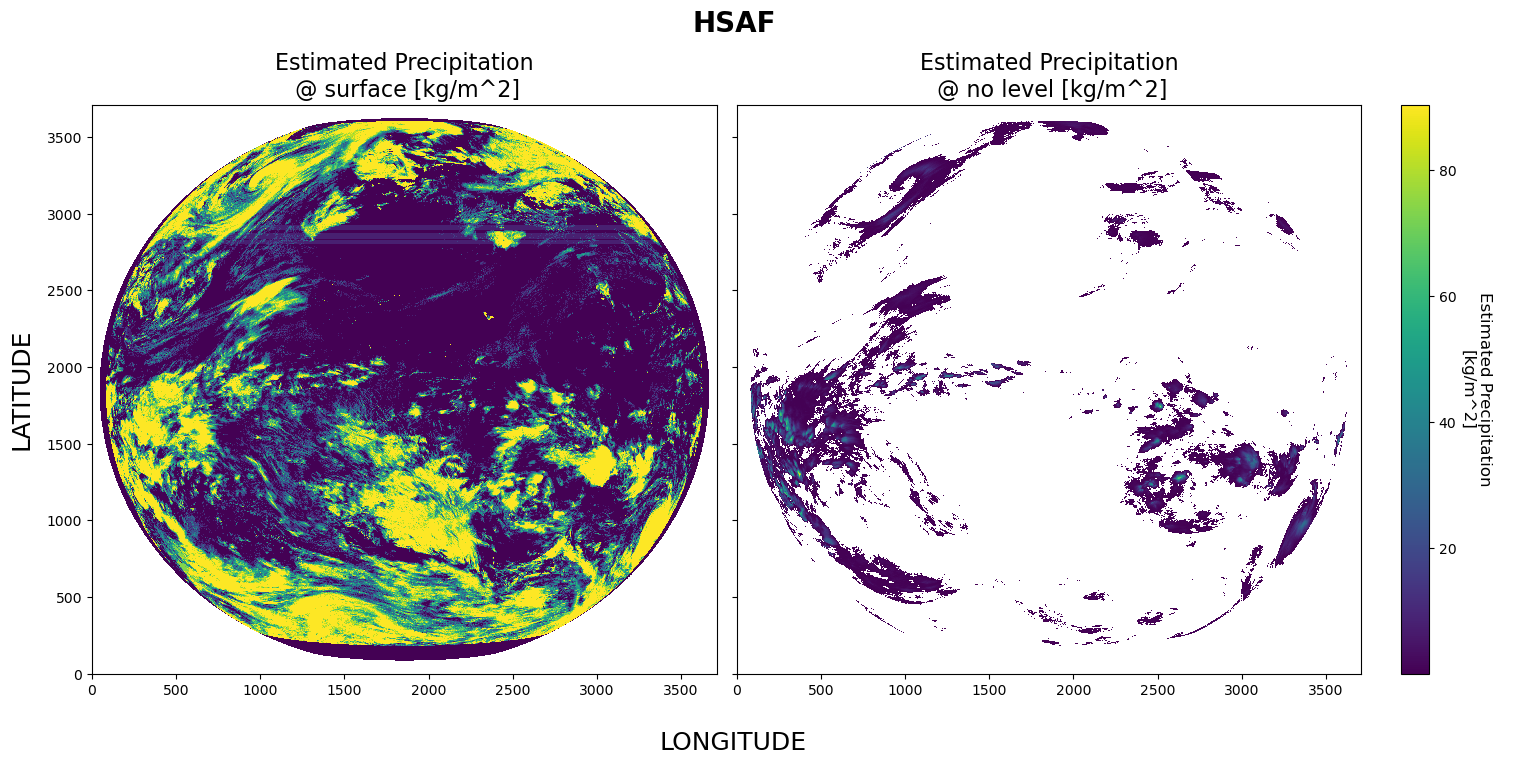

In [6]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = False

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,gridspec_kw={'width_ratios': [0.8, 1]})

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)


plot1=estp_surface.plot(ax=ax1,add_colorbar=False)

plot2=estp_no_level.plot(ax=ax2,add_colorbar=False)

fig.suptitle('HSAF',x=0.49,fontsize = 20,weight='bold')
ax1.set_title('Estimated Precipitation\n @ surface [kg/m^2]',fontsize = 16)
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2.set_title('Estimated Precipitation\n @ no level [kg/m^2]',fontsize = 16)
ax2.set_ylabel('')
ax2.set_xlabel('')


plt.xlabel("\nLONGITUDE",x=0.45,size=18)
plt.ylabel("LATITUDE",size=18)

cbar2 = plt.colorbar(plot2,ax=ax2)
cbar2.set_label('\nEstimated Precipitation\n[kg/m^2]',labelpad=+38, rotation=270,size=12)

plt.autoscale()
plt.tight_layout()

plt.show()

<div class="alert alert-info" role="alert">

## <a id='section2'></a>5. Select the Interested Area
[Back to top](#TOC_TOP)

</div>




Once you define the boundary box, you need to transform the longitude and latitude to arrays in x and y through <font color='red'> **numpy** </font>.

Then, use the <font color='red'> **"isel"** </font> function of the <font color='red'> **xarray** </font> to display the variable.

In [7]:
lat_max = 49
lat_min = 35
lon_max = 26
lon_min = 5

X_min = np.sqrt((lat_min- lat_all)**2 + (lon_min - lon_all)**2)

MIN = np.nanmin(X_min)

raw , col = np.where(X_min == MIN)

min_rlat = int(raw)
min_rlon = int(col)

X_max = np.sqrt((lat_max- lat_all)**2 + (lon_max - lon_all)**2)

MIN = np.nanmin(X_max)

raw , col = np.where(X_max == MIN)

max_rlat = int(raw)
max_rlon = int(col)


lon = lon_all.isel(y=slice(min_rlat,max_rlat),x= slice(min_rlon,max_rlon))
lat = lat_all.isel(y=slice(min_rlat,max_rlat),x= slice(min_rlon,max_rlon))

In [8]:
estp_1 = estp_surface.isel(y=slice(min_rlat,max_rlat),x= slice(min_rlon,max_rlon))
estp_2 = estp_no_level.isel(y=slice(min_rlat,max_rlat),x= slice(min_rlon,max_rlon))


<div class="alert alert-info" role="alert">

## <a id='section2'></a>6. Plot
[Back to top](#TOC_TOP)

</div>



In [9]:
# Plot configuration
width_inch = 16
height_inch = 8

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

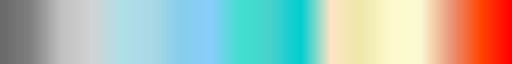

In [10]:
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dimgray","gray","silver","lightgrey","powderblue","lightblue","skyblue","lightskyblue","turquoise","mediumturquoise","darkturquoise","bisque","palegoldenrod","lemonchiffon","lightgoldenrodyellow","darksalmon","orangered","red"]) 
cmap

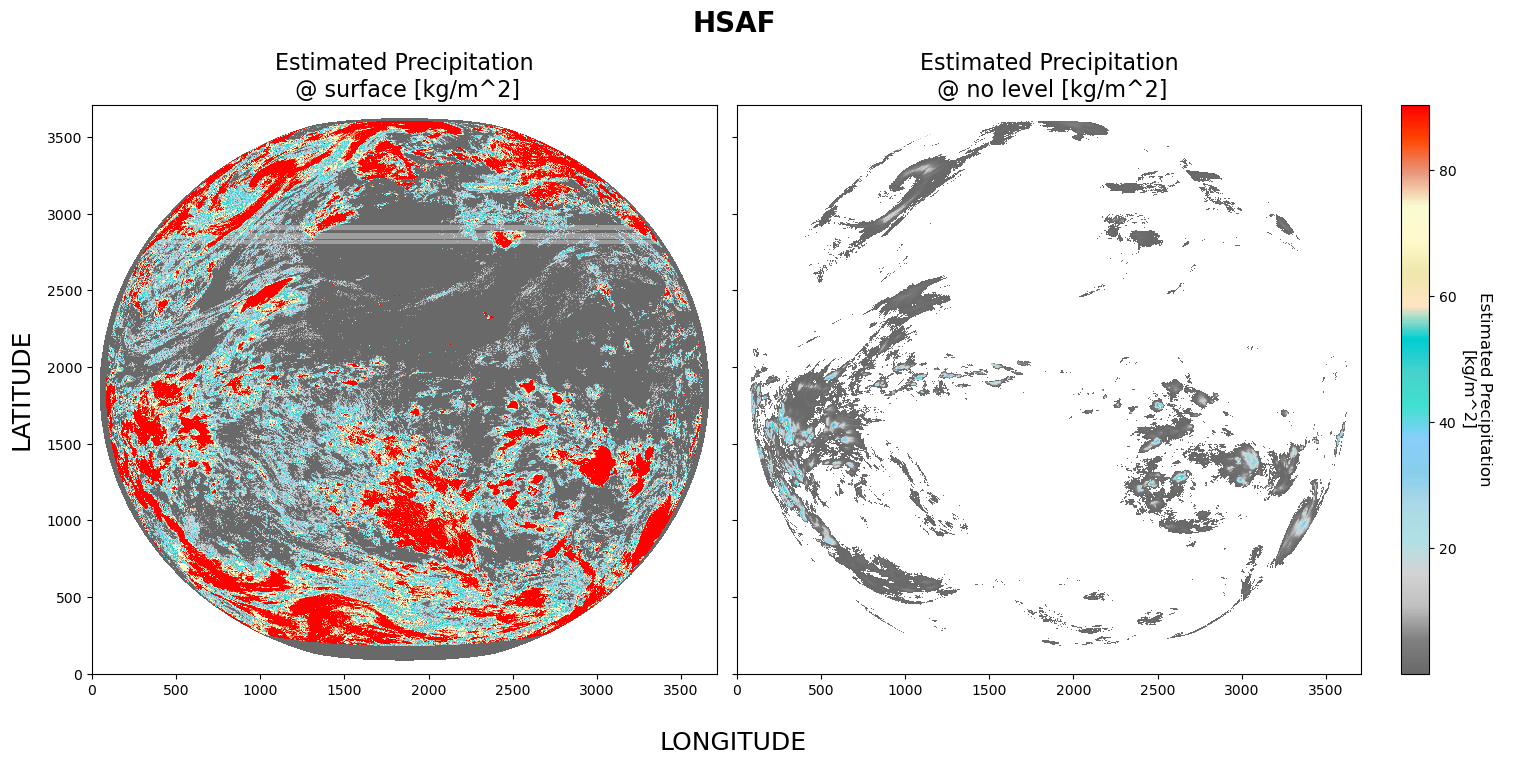

In [11]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = False

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,gridspec_kw={'width_ratios': [0.8, 1]})

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)


plot1=estp_surface.plot(ax=ax1,cmap=cmap,add_colorbar=False)

plot2=estp_no_level.plot(ax=ax2,cmap=cmap,add_colorbar=False)

fig.suptitle('HSAF',x=0.49,fontsize = 20,weight='bold')
ax1.set_title('Estimated Precipitation\n @ surface [kg/m^2]',fontsize = 16)
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2.set_title('Estimated Precipitation\n @ no level [kg/m^2]',fontsize = 16)
ax2.set_ylabel('')
ax2.set_xlabel('')


plt.xlabel("\nLONGITUDE",x=0.45,size=18)
plt.ylabel("LATITUDE",size=18)

cbar2 = plt.colorbar(plot2,ax=ax2)
cbar2.set_label('\nEstimated Precipitation\n[kg/m^2]',labelpad=+38, rotation=270,size=12)

plt.autoscale()
plt.tight_layout()

plt.show()

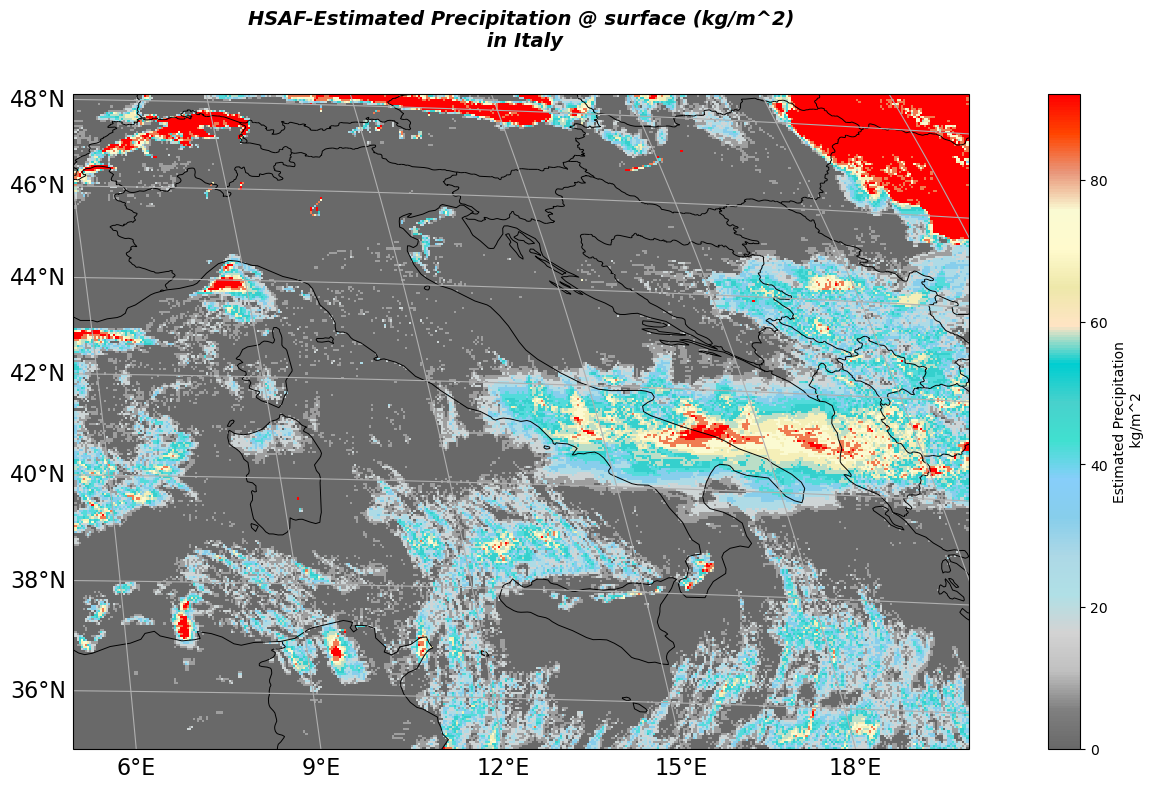

In [12]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(width_inch, height_inch))
ax = plt.axes(projection=ccrs.Geostationary())

ax.coastlines(resolution='50m', color='black', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='black',linewidths=0.7,alpha=0.9999)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

tx = ax.gridlines(draw_labels = True)
tx.xlabel_style = {'size': 16, 'color': 'k'}
tx.ylabel_style = {'size': 16, 'color': 'k'}

t_plot = ax.pcolor(lon, lat,np.squeeze(estp_1), transform=ccrs.PlateCarree(), cmap=cmap)

tx.xlabels_top = False
tx.ylabels_right = False

title = ("HSAF-Estimated Precipitation @ surface (kg/m^2)\n in Italy")
plt.title(title, **title_fontstyle)
plt.tight_layout()

cbar = plt.colorbar(t_plot,orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label('Estimated Precipitation\n kg/m^2')

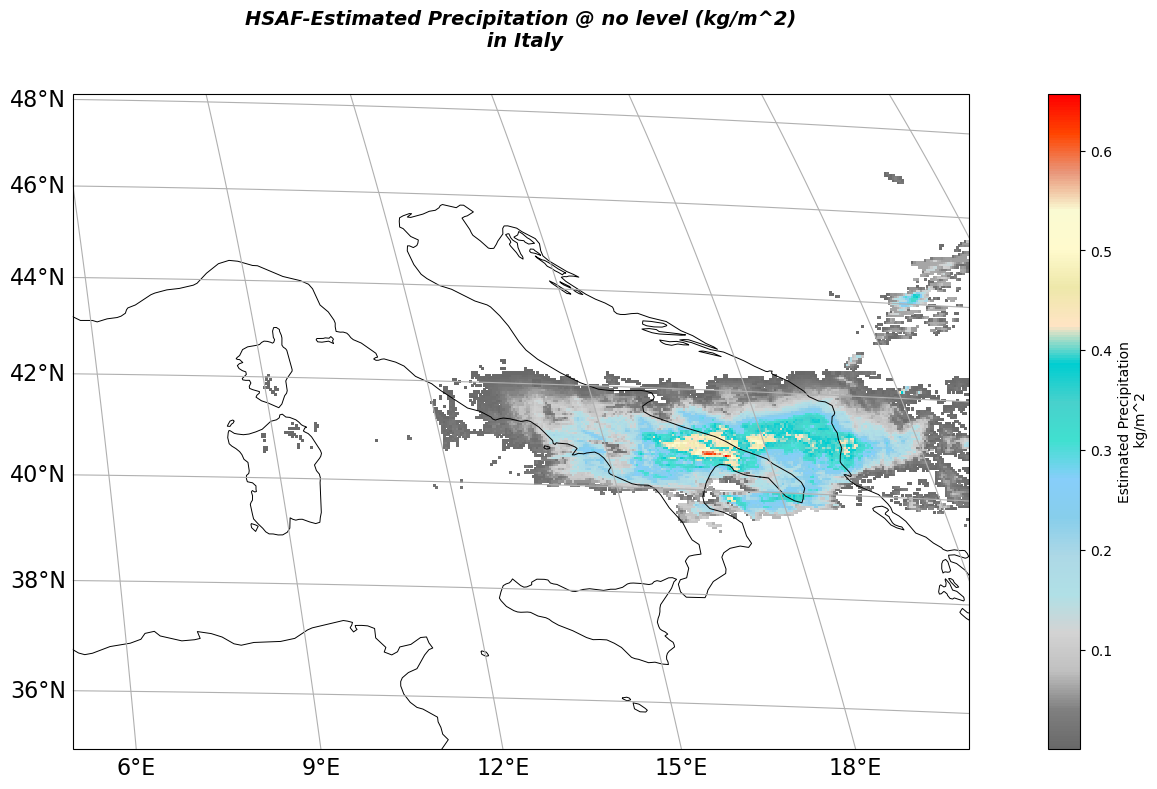

In [13]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(width_inch, height_inch))
ax = plt.axes(projection=ccrs.Geostationary())

ax.coastlines(resolution='50m', color='black', edgecolor='black',alpha=0.9999,linewidth=0.7)


tx = ax.gridlines(draw_labels = True)
tx.xlabel_style = {'size': 16, 'color': 'k'}
tx.ylabel_style = {'size': 16, 'color': 'k'}

t_plot = ax.pcolor(lon, lat,np.squeeze(estp_2), transform=ccrs.PlateCarree(), cmap=cmap)

tx.xlabels_top = False
tx.ylabels_right = False

title = ("HSAF-Estimated Precipitation @ no level (kg/m^2)\n in Italy")
plt.title(title, **title_fontstyle)
plt.tight_layout()

cbar = plt.colorbar(t_plot,orientation='vertical', fraction=0.05, pad=0.05)
cbar.set_label('Estimated Precipitation\n kg/m^2')